In [158]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
import gdal
from osgeo import gdal_array
import rasterstats as rs

In [159]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_rows", 1000, "display.max_columns", 1000)

In [160]:
ah = rio.open('D:\\MRes\\NewcastleBlueSky\\ortho\\NZ2364.tif')
ah2 = gdal.Open('D:\\MRes\\NewcastleBlueSky\\ortho\\NZ2364.tif')
ah_meta = ah.profile

In [161]:
cc = rio.open('C:\\Temp\\MRes\\tree_rasters\\City_Council_clip.tif')
cc2 = gdal.Open('C:\\Temp\\MRes\\tree_rasters\\City_Council_clip.tif')
cc_meta = cc.profile

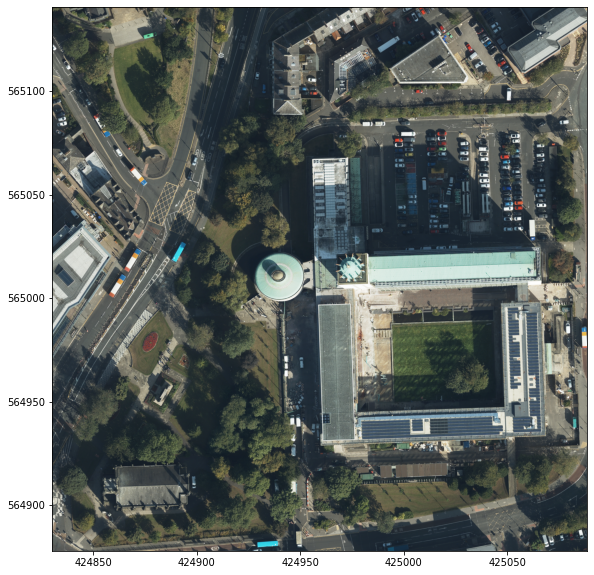

In [162]:
#%matplotlib notebook
fig, ax = plt.subplots(1, figsize=(12, 10))
show(cc.read(), transform=cc.transform, ax=ax)
plt.show()

Text(0.5, 1.0, 'Red')

Text(0.5, 1.0, 'Green')

Text(0.5, 1.0, 'Blue')

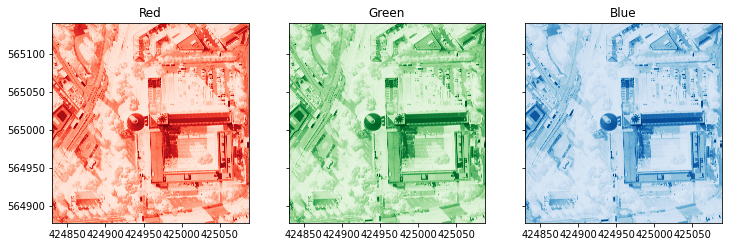

In [163]:
%matplotlib notebook
%matplotlib inline

# Initialize subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(12, 15), sharey=True)

# Plot Red, Green and Blue (rgb)
show((cc, 1), cmap='Reds', ax=ax1)
show((cc, 2), cmap='Greens', ax=ax2)
show((cc, 3), cmap='Blues', ax=ax3)

# Add titles
ax1.set_title("Red")
ax2.set_title("Green")
ax3.set_title("Blue")

plt.savefig('C:\\Temp\\MRes\\Figures\\b_bands.eps')

plt.show()

In [164]:
b1 = cc.read(1)
b2 = cc.read(2)
b3 = cc.read(3)

In [165]:
r = cc2.GetRasterBand(1)
g = cc2.GetRasterBand(2)
b = cc2.GetRasterBand(3)

In [166]:
r_array = r.ReadAsArray()
g_array = g.ReadAsArray()
b_array = b.ReadAsArray()

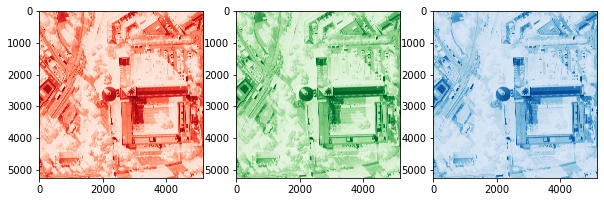

In [167]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))

ax1.imshow(b1, cmap='Reds')
ax2.imshow(b2, cmap='Greens')
ax3.imshow(b3, cmap='Blues')

plt.show()

In [168]:
trees = gpd.read_file('C:\\Temp\\MRes\\tree_shapefiles\\plot_b.shp')
#trees = trees.rename(columns={'X__X': 'X'})
trees.head()

OBJECTID   FID     TREETYPE  TREECODE  TREENO  \
0         3  2838  Single tree     21728   15425   
1         4  3807  Single tree     25916   17037   
2         7  5846  Single tree     34788    2323   
3        11  7388  Single tree     41444   15766   
4        12  8008  Single tree     44080    8985   

                                           SITENAME         SPECIES  \
0  Hancock Street, City Centre, Newcastle Upon Tyne     Prunus spp.   
1  Hancock Street, City Centre, Newcastle Upon Tyne     Prunus spp.   
2  Hancock Street, City Centre, Newcastle Upon Tyne       Acer spp.   
3  Hancock Street, City Centre, Newcastle Upon Tyne       Acer spp.   
4  Hancock Street, City Centre, Newcastle Upon Tyne  Sambucus nigra   

     COMMONNAME                                   LASTVISIT FELLED PROPOSED  \
0    Cherry spp  Last visit 07/10/2010 by MR for Inspection     No       No   
1    Cherry spp  Last visit 07/10/2010 by MR for Inspection     No       No   
2     Maple spp  Last visit 07/10/2010 by MR for Inspection     No       No   
3     Maple spp  Last visit 07/10/2010 by MR for Inspection     No       No   
4  Common Elder  Last visit 07/10/2010 by MR for Inspection     No       No   

  HIDDEN  FEATREF OVERLAY            X            Y  treeID  crownArea  \
0     No   198971   Trees  425069.0000  565111.0000       1      99.18   
1     No   192931   Trees  425063.0000  565107.0000       2       6.57   
2     No   193202   Trees  424940.1088  565086.1895       3      10.62   
3     No   195407   Trees  424944.9718  565086.3915       4      10.35   
4     No   202467   Trees  424935.4532  565085.7012       5      21.24   

                                            geometry  
0  POLYGON ((425066.700 565102.200, 425066.700 56...  
1  POLYGON ((425062.200 565105.200, 425062.200 56...  
2  POLYGON ((424941.600 565083.900, 424941.600 56...  
3  POLYGON ((424944.900 565084.200, 424944.900 56...  
4  POLYGON ((424932.900 565081.800, 424932.900 56...

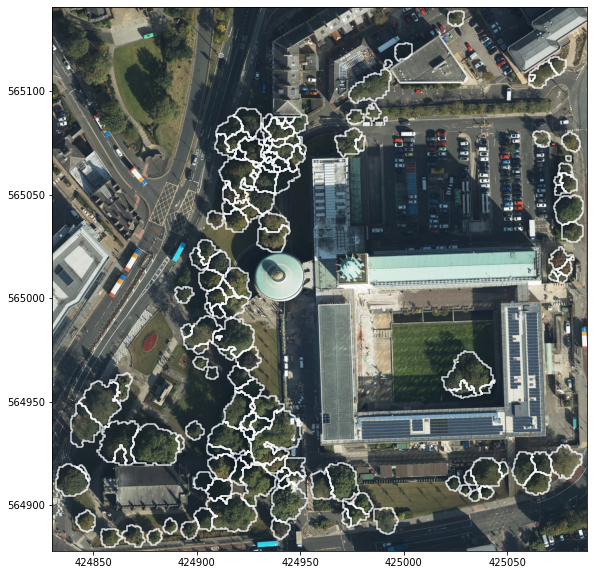

In [170]:
fig, ax = plt.subplots(figsize=(12, 10))
show(cc.read(), transform=cc.transform, ax=ax)
trees.boundary.plot(ax=ax, alpha=.80, color = 'white')

plt.savefig('C:\\Temp\\MRes\\Figures\\b_crowns.png')

plt.show()

In [31]:
trees_series = trees['geometry']

In [32]:
print(trees_series)

0      POLYGON ((425066.700 565102.200, 425066.700 56...
1      POLYGON ((425062.200 565105.200, 425062.200 56...
2      POLYGON ((424941.600 565083.900, 424941.600 56...
3      POLYGON ((424944.900 565084.200, 424944.900 56...
4      POLYGON ((424932.900 565081.800, 424932.900 56...
5      POLYGON ((424914.900 565077.000, 424914.900 56...
6      POLYGON ((424940.400 565084.500, 424940.700 56...
7      POLYGON ((425026.500 565131.300, 425026.200 56...
8      POLYGON ((424992.300 565111.500, 424992.300 56...
9      POLYGON ((424998.300 565114.800, 424998.300 56...
10     POLYGON ((424937.700 565076.100, 424937.700 56...
11     POLYGON ((424977.000 565094.400, 424977.000 56...
12     POLYGON ((424949.400 565080.000, 424949.400 56...
13     POLYGON ((424927.200 565077.600, 424927.200 56...
14     POLYGON ((424942.800 565082.100, 424942.800 56...
15     POLYGON ((425074.800 565107.900, 425074.800 56...
16     POLYGON ((424933.500 565076.700, 424933.500 56...
17     POLYGON ((424918.200 564

In [33]:
trees_series = gpd.GeoSeries(trees_series)

In [34]:
ttops = gpd.GeoSeries.scale(trees_series, xfact=0.5, yfact=0.5, zfact=0.5, origin='centroid')

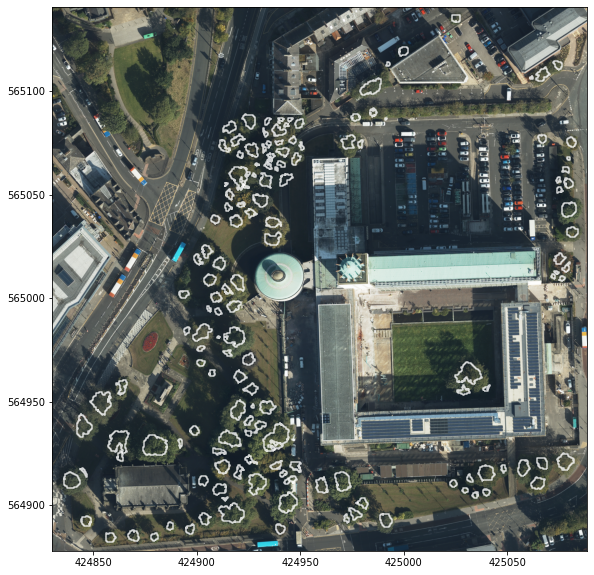

In [171]:
fig, ax = plt.subplots(figsize=(12, 10))
show(cc.read(), transform=cc.transform, ax=ax)
ttops.boundary.plot(ax=ax, color='white', alpha=.80)

plt.savefig('C:\\Temp\\MRes\\Figures\\b_raster_ttops.png')

plt.show()

In [38]:
print(ttops)

0      POLYGON ((425066.812 565105.005, 425066.812 56...
1      POLYGON ((425061.979 565105.815, 425061.979 56...
2      POLYGON ((424941.217 565085.054, 424941.217 56...
3      POLYGON ((424944.901 565085.189, 424944.901 56...
4      POLYGON ((424933.475 565083.658, 424933.475 56...
5      POLYGON ((424915.471 565079.737, 424915.471 56...
6      POLYGON ((424939.897 565084.681, 424940.047 56...
7      POLYGON ((425025.834 565133.202, 425025.684 56...
8      POLYGON ((424992.354 565112.262, 424992.354 56...
9      POLYGON ((424999.037 565116.991, 424999.037 56...
10     POLYGON ((424938.584 565078.404, 424938.584 56...
11     POLYGON ((424980.673 565098.105, 424980.673 56...
12     POLYGON ((424949.438 565082.079, 424949.438 56...
13     POLYGON ((424926.346 565081.609, 424926.346 56...
14     POLYGON ((424942.937 565082.842, 424942.937 56...
15     POLYGON ((425074.618 565110.255, 425074.618 56...
16     POLYGON ((424933.268 565078.176, 424933.268 56...
17     POLYGON ((424917.569 564

In [39]:
trees['geometry'] = ttops
trees.to_file('C://Temp//MRes//tree_shapefiles//b_ttops.shp')

In [40]:
def derive_stats(geom, data = cc, **mask_kw):
    masked, mask_transform = rio.mask.mask(dataset = data, shapes = geom, crop = True, all_touched = True, filled = True)
    return masked

In [20]:
#trees['mean_red'] = trees.geometry.apply(derive_stats).apply(np.mean)

In [41]:
r_stats = rs.zonal_stats

In [51]:
a_red_stats = rs.zonal_stats('C://Temp//MRes//tree_shapefiles//b_ttops.shp',
                            r_array,
                            nodata = -999,
                            affine = cc_meta['transform'],
                            geojson_out=True,
                            copy_properties=True,
                            stats="count min mean max median")

In [52]:
a_green_stats = rs.zonal_stats('C://Temp//MRes//tree_shapefiles//b_ttops.shp',
                            g_array,
                            nodata = -999,
                            affine = cc_meta['transform'],
                            geojson_out=True,
                            copy_properties=True,
                            stats="count min mean max median")

In [53]:
a_blue_stats = rs.zonal_stats('C://Temp//MRes//tree_shapefiles//b_ttops.shp',
                            b_array,
                            nodata = -999,
                            affine = cc_meta['transform'],
                            geojson_out=True,
                            copy_properties=True,
                            stats="count min mean max median")

In [54]:
b_red_stats_df = gpd.GeoDataFrame.from_features(a_red_stats)
b_red = a_red_stats_df.rename(columns={'min': 'r_min', 'max' : 'r_max', 'mean' : 'r_mean', 'median' : 'r_median'})
b_red.head()

geometry  OBJECTID   FID  \
0  POLYGON ((425066.812 565105.005, 425066.812 56...         3  2838   
1  POLYGON ((425061.979 565105.815, 425061.979 56...         4  3807   
2  POLYGON ((424941.217 565085.054, 424941.217 56...         7  5846   
3  POLYGON ((424944.901 565085.189, 424944.901 56...        11  7388   
4  POLYGON ((424933.475 565083.658, 424933.475 56...        12  8008   

      TREETYPE  TREECODE  TREENO  \
0  Single tree     21728   15425   
1  Single tree     25916   17037   
2  Single tree     34788    2323   
3  Single tree     41444   15766   
4  Single tree     44080    8985   

                                           SITENAME         SPECIES  \
0  Hancock Street, City Centre, Newcastle Upon Tyne     Prunus spp.   
1  Hancock Street, City Centre, Newcastle Upon Tyne     Prunus spp.   
2  Hancock Street, City Centre, Newcastle Upon Tyne       Acer spp.   
3  Hancock Street, City Centre, Newcastle Upon Tyne       Acer spp.   
4  Hancock Street, City Centre, Newcastle Upon Tyne  Sambucus nigra   

     COMMONNAME                                   LASTVISIT FELLED PROPOSED  \
0    Cherry spp  Last visit 07/10/2010 by MR for Inspection     No       No   
1    Cherry spp  Last visit 07/10/2010 by MR for Inspection     No       No   
2     Maple spp  Last visit 07/10/2010 by MR for Inspection     No       No   
3     Maple spp  Last visit 07/10/2010 by MR for Inspection     No       No   
4  Common Elder  Last visit 07/10/2010 by MR for Inspection     No       No   

  HIDDEN  FEATREF OVERLAY            X            Y  treeID  crownArea  r_min  \
0     No   198971   Trees  425069.0000  565111.0000       1      99.18   36.0   
1     No   192931   Trees  425063.0000  565107.0000       2       6.57   43.0   
2     No   193202   Trees  424940.1088  565086.1895       3      10.62   25.0   
3     No   195407   Trees  424944.9718  565086.3915       4      10.35   21.0   
4     No   202467   Trees  424935.4532  565085.7012       5      21.24   19.0   

   r_max     r_mean  count  r_median  
0  175.0  83.444344   9918      82.0  
1  128.0  79.704718    657      79.0  
2  101.0  43.959510   1062      41.0  
3   88.0  38.314976   1035      32.0  
4   56.0  27.156309   2124      26.0

In [55]:
b_green_stats_df = gpd.GeoDataFrame.from_features(a_green_stats)
b_green = a_green_stats_df.rename(columns={'min': 'g_min', 'max' : 'g_max', 'mean' : 'g_mean', 'median' : 'g_median'})
b_green.head()

geometry  OBJECTID   FID  \
0  POLYGON ((425066.812 565105.005, 425066.812 56...         3  2838   
1  POLYGON ((425061.979 565105.815, 425061.979 56...         4  3807   
2  POLYGON ((424941.217 565085.054, 424941.217 56...         7  5846   
3  POLYGON ((424944.901 565085.189, 424944.901 56...        11  7388   
4  POLYGON ((424933.475 565083.658, 424933.475 56...        12  8008   

      TREETYPE  TREECODE  TREENO  \
0  Single tree     21728   15425   
1  Single tree     25916   17037   
2  Single tree     34788    2323   
3  Single tree     41444   15766   
4  Single tree     44080    8985   

                                           SITENAME         SPECIES  \
0  Hancock Street, City Centre, Newcastle Upon Tyne     Prunus spp.   
1  Hancock Street, City Centre, Newcastle Upon Tyne     Prunus spp.   
2  Hancock Street, City Centre, Newcastle Upon Tyne       Acer spp.   
3  Hancock Street, City Centre, Newcastle Upon Tyne       Acer spp.   
4  Hancock Street, City Centre, Newcastle Upon Tyne  Sambucus nigra   

     COMMONNAME                                   LASTVISIT FELLED PROPOSED  \
0    Cherry spp  Last visit 07/10/2010 by MR for Inspection     No       No   
1    Cherry spp  Last visit 07/10/2010 by MR for Inspection     No       No   
2     Maple spp  Last visit 07/10/2010 by MR for Inspection     No       No   
3     Maple spp  Last visit 07/10/2010 by MR for Inspection     No       No   
4  Common Elder  Last visit 07/10/2010 by MR for Inspection     No       No   

  HIDDEN  FEATREF OVERLAY            X            Y  treeID  crownArea  g_min  \
0     No   198971   Trees  425069.0000  565111.0000       1      99.18   43.0   
1     No   192931   Trees  425063.0000  565107.0000       2       6.57   41.0   
2     No   193202   Trees  424940.1088  565086.1895       3      10.62   33.0   
3     No   195407   Trees  424944.9718  565086.3915       4      10.35   28.0   
4     No   202467   Trees  424935.4532  565085.7012       5      21.24   27.0   

   g_max     g_mean  count  g_median  
0  171.0  86.488607   9918      85.0  
1  124.0  76.780822    657      75.0  
2  108.0  52.232580   1062      49.0  
3   96.0  46.436715   1035      41.0  
4   60.0  35.870527   2124      35.0

In [56]:
b_blue_stats_df = gpd.GeoDataFrame.from_features(a_blue_stats)
b_blue = a_blue_stats_df.rename(columns={'min': 'b_min', 'max' : 'b_max', 'mean' : 'b_mean', 'median' : 'b_median'})
b_blue.head()

geometry  OBJECTID   FID  \
0  POLYGON ((425066.812 565105.005, 425066.812 56...         3  2838   
1  POLYGON ((425061.979 565105.815, 425061.979 56...         4  3807   
2  POLYGON ((424941.217 565085.054, 424941.217 56...         7  5846   
3  POLYGON ((424944.901 565085.189, 424944.901 56...        11  7388   
4  POLYGON ((424933.475 565083.658, 424933.475 56...        12  8008   

      TREETYPE  TREECODE  TREENO  \
0  Single tree     21728   15425   
1  Single tree     25916   17037   
2  Single tree     34788    2323   
3  Single tree     41444   15766   
4  Single tree     44080    8985   

                                           SITENAME         SPECIES  \
0  Hancock Street, City Centre, Newcastle Upon Tyne     Prunus spp.   
1  Hancock Street, City Centre, Newcastle Upon Tyne     Prunus spp.   
2  Hancock Street, City Centre, Newcastle Upon Tyne       Acer spp.   
3  Hancock Street, City Centre, Newcastle Upon Tyne       Acer spp.   
4  Hancock Street, City Centre, Newcastle Upon Tyne  Sambucus nigra   

     COMMONNAME                                   LASTVISIT FELLED PROPOSED  \
0    Cherry spp  Last visit 07/10/2010 by MR for Inspection     No       No   
1    Cherry spp  Last visit 07/10/2010 by MR for Inspection     No       No   
2     Maple spp  Last visit 07/10/2010 by MR for Inspection     No       No   
3     Maple spp  Last visit 07/10/2010 by MR for Inspection     No       No   
4  Common Elder  Last visit 07/10/2010 by MR for Inspection     No       No   

  HIDDEN  FEATREF OVERLAY            X            Y  treeID  crownArea  b_min  \
0     No   198971   Trees  425069.0000  565111.0000       1      99.18   21.0   
1     No   192931   Trees  425063.0000  565107.0000       2       6.57   26.0   
2     No   193202   Trees  424940.1088  565086.1895       3      10.62   35.0   
3     No   195407   Trees  424944.9718  565086.3915       4      10.35   35.0   
4     No   202467   Trees  424935.4532  565085.7012       5      21.24   35.0   

   b_max     b_mean  count  b_median  
0  142.0  65.958964   9918      64.0  
1  104.0  60.607306    657      58.0  
2   90.0  50.119586   1062      48.0  
3   90.0  49.017391   1035      45.0  
4   62.0  42.020716   2124      42.0

<IPython.core.display.Javascript object>


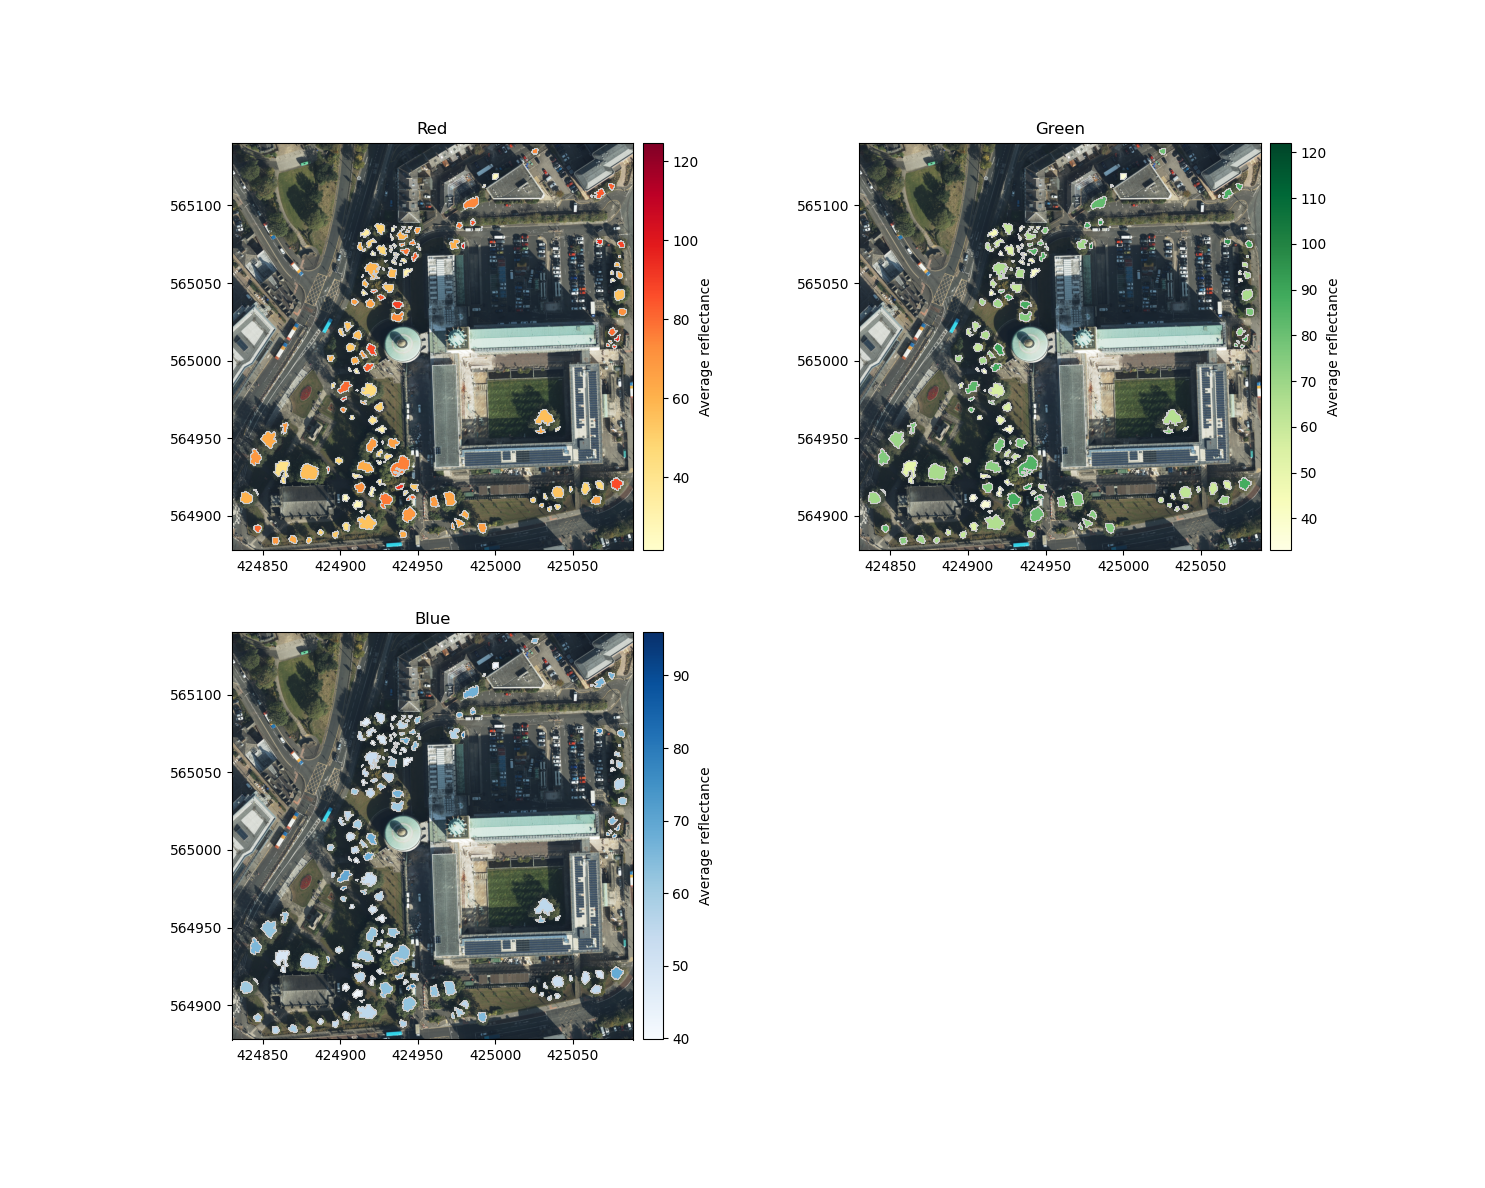

Text(0.5, 1.0, 'Red')

Text(0.5, 1.0, 'Green')

Text(0.5, 1.0, 'Blue')

Text(0, 0.5, 'Average reflectance')

Text(0, 0.5, 'Average reflectance')

Text(0, 0.5, 'Average reflectance')

In [129]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(15, 12))
fig.subplots_adjust(wspace = 0.2, hspace = 0.2)

ax1 = plt.subplot2grid((2,2), (0,0)) 
ax2 = plt.subplot2grid((2,2), (0,1)) 
ax3 = plt.subplot2grid((2,2), (1,0)) 

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.1)

divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="5%", pad=0.1)

show(cc.read(), transform = cc.transform, ax=ax1)
show(cc.read(), transform=cc.transform, ax=ax2)
show(cc.read(), transform=cc.transform, ax=ax3)

a_red_stats_df.plot(column='mean', cmap='YlOrRd', linewidth=0.8, ax=ax1, edgecolor='0.8', legend = True, cax=cax)
a_green_stats_df.plot(column='mean', cmap='YlGn', linewidth=0.8, ax=ax2, edgecolor='0.8', legend = True, cax=cax2)
a_blue_stats_df.plot(column='mean', cmap='Blues', linewidth=0.8, ax=ax3, edgecolor='0.8', legend = True, cax=cax3)

ax1.set_title('Red')
ax2.set_title('Green')
ax3.set_title('Blue')

ax1.set_ylabel('Average reflectance')
ax1.yaxis.set_label_coords(1.2, 0.5)

ax2.set_ylabel('Average reflectance')
ax2.yaxis.set_label_coords(1.2, 0.5)

ax3.set_ylabel('Average reflectance')
ax3.yaxis.set_label_coords(1.2, 0.5)

plt.show()

plt.savefig('C:\\Temp\\MRes\\Figures\\b_rgb_avg.eps')

In [131]:
b_green = b_green.drop(columns=['geometry', 'X', 'Y', 'crownArea', 'count'])

In [141]:
b_green.drop(b_green.columns.difference(['treeID', 'g_min','g_max', 'g_mean', 'g_median']), 1, inplace=True)

In [142]:
b_green.head()

treeID  g_min  g_max     g_mean  g_median
0       1   43.0  171.0  86.488607      85.0
1       2   41.0  124.0  76.780822      75.0
2       3   33.0  108.0  52.232580      49.0
3       4   28.0   96.0  46.436715      41.0
4       5   27.0   60.0  35.870527      35.0

In [133]:
b_blue = b_blue.drop(columns=['geometry', 'X', 'Y', 'crownArea', 'count'])

In [139]:
b_blue.drop(b_blue.columns.difference(['treeID', 'b_min','b_max', 'b_mean', 'b_median']), 1, inplace=True)

In [143]:
b_rg = pd.merge(b_red, b_green, on=['treeID'])
b_rgb = pd.merge(b_rg, b_blue, on=['treeID'])

In [144]:
b_rgb.head()

geometry  OBJECTID   FID  \
0  POLYGON ((425066.812 565105.005, 425066.812 56...         3  2838   
1  POLYGON ((425061.979 565105.815, 425061.979 56...         4  3807   
2  POLYGON ((424941.217 565085.054, 424941.217 56...         7  5846   
3  POLYGON ((424944.901 565085.189, 424944.901 56...        11  7388   
4  POLYGON ((424933.475 565083.658, 424933.475 56...        12  8008   

      TREETYPE  TREECODE  TREENO  \
0  Single tree     21728   15425   
1  Single tree     25916   17037   
2  Single tree     34788    2323   
3  Single tree     41444   15766   
4  Single tree     44080    8985   

                                           SITENAME         SPECIES  \
0  Hancock Street, City Centre, Newcastle Upon Tyne     Prunus spp.   
1  Hancock Street, City Centre, Newcastle Upon Tyne     Prunus spp.   
2  Hancock Street, City Centre, Newcastle Upon Tyne       Acer spp.   
3  Hancock Street, City Centre, Newcastle Upon Tyne       Acer spp.   
4  Hancock Street, City Centre, Newcastle Upon Tyne  Sambucus nigra   

     COMMONNAME                                   LASTVISIT FELLED PROPOSED  \
0    Cherry spp  Last visit 07/10/2010 by MR for Inspection     No       No   
1    Cherry spp  Last visit 07/10/2010 by MR for Inspection     No       No   
2     Maple spp  Last visit 07/10/2010 by MR for Inspection     No       No   
3     Maple spp  Last visit 07/10/2010 by MR for Inspection     No       No   
4  Common Elder  Last visit 07/10/2010 by MR for Inspection     No       No   

  HIDDEN  FEATREF OVERLAY            X            Y  treeID  crownArea  r_min  \
0     No   198971   Trees  425069.0000  565111.0000       1      99.18   36.0   
1     No   192931   Trees  425063.0000  565107.0000       2       6.57   43.0   
2     No   193202   Trees  424940.1088  565086.1895       3      10.62   25.0   
3     No   195407   Trees  424944.9718  565086.3915       4      10.35   21.0   
4     No   202467   Trees  424935.4532  565085.7012       5      21.24   19.0   

   r_max     r_mean  count  r_median  g_min  g_max     g_mean  g_median  \
0  175.0  83.444344   9918      82.0   43.0  171.0  86.488607      85.0   
1  128.0  79.704718    657      79.0   41.0  124.0  76.780822      75.0   
2  101.0  43.959510   1062      41.0   33.0  108.0  52.232580      49.0   
3   88.0  38.314976   1035      32.0   28.0   96.0  46.436715      41.0   
4   56.0  27.156309   2124      26.0   27.0   60.0  35.870527      35.0   

   b_min  b_max     b_mean  b_median  
0   21.0  142.0  65.958964      64.0  
1   26.0  104.0  60.607306      58.0  
2   35.0   90.0  50.119586      48.0  
3   35.0   90.0  49.017391      45.0  
4   35.0   62.0  42.020716      42.0

In [153]:
b_rgb.to_file('C://Temp//MRes//tree_shapefiles//b_treePolygons.shp')

In [38]:
a_polygons = gpd.read_file('C://Temp//MRes//tree_point_clouds//plot_a_segments.shp')

In [40]:
a_polygons = a_polygons.rename(columns={'X__X': 'X'})
a_polygons.head()

X              Y          Z  treeID  crownArea  \
0  423592.190002  564841.139999  15.837778       1     236.70   
1  423710.959991  564645.849998   8.073334       2      67.05   
2  423815.119995  564734.809998  11.798889       3      45.45   
3  423713.329987  564733.419998   5.212000       4       3.24   
4  423469.847603  564818.995499   7.046667       5      15.21   

                                            geometry  
0  POLYGON ((423597.300 564829.800, 423597.300 56...  
1  POLYGON ((423712.800 564644.100, 423712.800 56...  
2  POLYGON ((423819.900 564730.200, 423819.900 56...  
3  POLYGON ((423713.400 564732.600, 423713.400 56...  
4  POLYGON ((423469.500 564817.800, 423469.500 56...

In [41]:
a_rgb = a_rgb.drop(columns=['geometry', 'X', 'Y', 'Z', 'crownArea'])

In [42]:
a_trees = pd.merge(a_rgb, a_polygons, on=['treeID'])

In [43]:
a_trees.head()

treeID  r_min  r_max      r_mean  count  r_median  g_min  g_max     g_mean  \
0       1   24.0  152.0   79.550824  23670      80.0   34.0  160.0  89.357964   
1       2   33.0  200.0  104.325578   6705      93.0   36.0  181.0  94.354064   
2       3   28.0  153.0   76.669527   4545      76.0   37.0  153.0  83.174697   
3       4   29.0   65.0   37.709877    324      36.0   38.0   73.0  47.083333   
4       5   29.0  139.0   77.166995   1521      74.0   32.0  146.0  81.047995   

   g_median  b_min  b_max     b_mean  b_median              X              Y  \
0      90.0   10.0  139.0  66.385551      65.0  423592.190002  564841.139999   
1      89.0    1.0  142.0  64.965399      64.0  423710.959991  564645.849998   
2      82.0    1.0  127.0  60.392079      58.0  423815.119995  564734.809998   
3      46.0   39.0   65.0  46.817901      46.0  423713.329987  564733.419998   
4      81.0   18.0  124.0  64.554241      62.0  423469.847603  564818.995499   

           Z  crownArea                                           geometry  
0  15.837778     236.70  POLYGON ((423597.300 564829.800, 423597.300 56...  
1   8.073334      67.05  POLYGON ((423712.800 564644.100, 423712.800 56...  
2  11.798889      45.45  POLYGON ((423819.900 564730.200, 423819.900 56...  
3   5.212000       3.24  POLYGON ((423713.400 564732.600, 423713.400 56...  
4   7.046667      15.21  POLYGON ((423469.500 564817.800, 423469.500 56...

In [44]:
a_trees.to_file('C://Temp//MRes//tree_point_clouds//Plot_A_shapefiles//a_treePolygons.shp')